In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Load and preprocessing data

In [2]:
filename_test = "./fashion-mnist_test.csv"
filename_train = "./fashion-mnist_train.csv"
filename_classes = "./classes.csv"

df_train = pd.read_csv(filename_train, delimiter=',')
df_test = pd.read_csv(filename_test, delimiter=',')
df_classes = pd.read_csv(filename_classes, delimiter=',')

In [3]:
X_train = df_train.loc[:, df_train.columns != "label"]
Y_train = df_train.loc[:, df_train.columns == "label"]

X_test = df_test.loc[:, df_train.columns != "label"]
Y_test = df_test.loc[:, df_train.columns == "label"]

classes = df_classes["class"]

print('Training set: X={}, y={}'.format(X_train.shape, Y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, Y_test.shape))

Training set: X=(60000, 784), y=(60000, 1)
Test set: X=(10000, 784), y=(10000, 1)


In [4]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
values_counts = Y_train.label.value_counts()

pd.DataFrame({ "label": [classes[idx] for idx in values_counts.index], "value": values_counts.values })

,label,value
0,Ankle boot,6000
1,Bag,6000
2,Sneaker,6000
3,Shirt,6000
4,Sandal,6000
5,Coat,6000
6,Dress,6000
7,Pullover,6000
8,Trouser,6000
9,T-shirt/top,6000


In [6]:
values_counts = Y_test.label.value_counts()

pd.DataFrame({ "label": [classes[idx] for idx in values_counts.index], "value": values_counts.values })

,label,value
0,Sneaker,1000
1,Shirt,1000
2,Sandal,1000
3,Coat,1000
4,Dress,1000
5,Pullover,1000
6,Ankle boot,1000
7,Trouser,1000
8,Bag,1000
9,T-shirt/top,1000


In [7]:
df_classes

,class
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


##### Converting data to numpy

In [8]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

### Showing dataset image


In [9]:
def show_samples(X, nrows=5, ncols=5, rsize=5, csize=5):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex='col', sharey='row', 
                           gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(rsize, csize))

    counter=0
    for row in ax:
        for col in row:
            col.imshow(X[counter], 'gray')
            counter += 1
    plt.show()

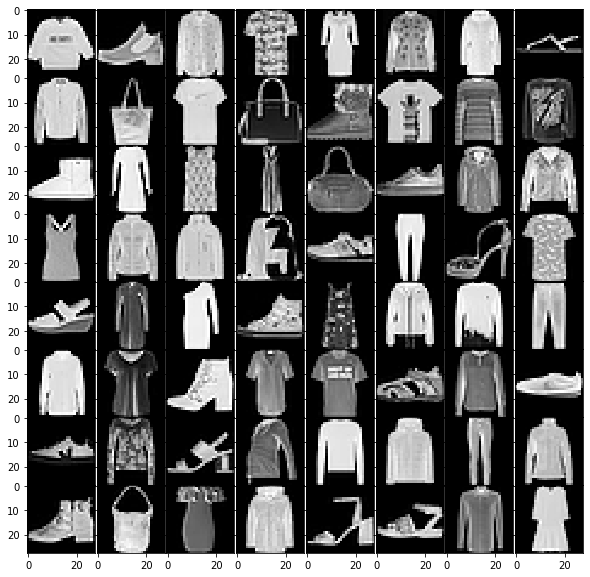

In [10]:
X_show = X_train.reshape(-1,28,28)
show_samples(X_show, nrows=8, ncols=8, rsize=10, csize=10)

### Using Pipeline and ColumnTransformer for onehot encoding

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat = ["label"]

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(categories ='auto'))
])

full_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat)
])

Y_train_encoded = full_pipeline.fit_transform(Y_train).toarray()

print(f"X train set shape: {X_train.shape}")
print(f"Y train set shape: {Y_train_encoded.shape}")

X train set shape: (60000, 784)
Y train set shape: (60000, 10)


# MLPClassifier

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier().fit(X_train, np.ravel(Y_train))

In [13]:
print(classification_report(Y_test, clf.predict(X_test), target_names=classes))

NameError: name 'classification_report' is not defined

In [ ]:
print(f"Accuracy:  {accuracy_score(Y_test, clf.predict(X_test))}")
print(f"Precision: {precision_score(Y_test, clf.predict(X_test), average='weighted')}")
print(f"Recall:    {recall_score(Y_test, clf.predict(X_test), average='weighted')}")

# Hyperparameters tunning for Custom Neural Network

#### Custom scorer


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

def custom_scorer(estimator, X, Y):
    # transform from one hot encoding to label encoding 
    y_true = np.argmax(Y, axis=1)
    y_pred = estimator.predict(X)
    return accuracy_score(y_true, y_pred)

In [ ]:
accuracy_scorer = make_scorer(custom_scorer)

#### Using GridSearchCV for fitting the best parameters

In [ ]:
from NeuralNetwork import NeuralNet
from sklearn.model_selection import GridSearchCV

model_params = dict(
                hidden_layer_sizes=[(50, ), (100, )],
                normalize=[True],
                learning_rate=[1, 0.1], 
                max_iter=[50, 100],
                batch_size=[1024, 4096, 16384, -1],
                momentum=[0, 0.5, 0.9]
)
    
model = NeuralNet()

# note
# cv - cross validation, multply the number of executions by checking variations of train/test data spliting
# n_jobs - cpu processors, n_jobs=-1 - all accessible
# scoring - custom scorer, could be build into the estimator    
grid = GridSearchCV(estimator=model, param_grid=model_params, scoring=custom_scorer, cv=2, n_jobs=-1)

#### Output best parameters

In [14]:
res = [print(f"{key}: {val}") for key, val in grid.best_params_.items()]

NameError: name 'grid' is not defined